3. 调试超参数，观察学习率和批次大小对训练的影响

In [1]:
# 导入KMNIST数据集
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision.transforms.v2 import ToTensor #转换图像数据为张量
from torchvision.datasets import KMNIST # 导入KMNIST数据集
from torch.utils.data import DataLoader # 导入DataLoader数据加载器

In [2]:
# 超参数: 学习率,batch_size 不同值的效果
epochs = 10
BATCH_SIZE = 256
learings = [0.01, 0.001, 0.0001]

In [3]:
# 加载数据集
train_dataset = KMNIST(root='./data', train=True, download=True, transform=ToTensor())
test_dataset = KMNIST(root='./data', train=False, download=True, transform=ToTensor())

g:\Hmsoft\Anaconda\package\envs\py312\Lib\site-packages\torchvision\transforms\v2\_deprecated.py:42: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.Output is equivalent up to float precision.
  warnings.warn(


In [4]:
# 创建数据加载器
train_loader = DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=BATCH_SIZE, shuffle=False)

In [6]:
# 定义训练模型
# 定义训练模型
def train_iter(epochs, model, train_loader, LR):
    print(f"----------------学习率 is :{LR}")
    
    train_history = []
    # 定义损失函数,优化器
    loss_fn = nn.CrossEntropyLoss()  # 交叉熵损失函数
    optimizer = optim.SGD(model.parameters(), lr=LR)

    for epoch in range(epochs):
        # 提取数据
        for data, target in train_loader:
            # 前向计算
            data = data.reshape(-1, 784)  # 将数据展平
            output = model(data)
            # 计算损失
            loss = loss_fn(output, target)
            # 反向传播
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        # 打印损失
        print("Epoch:", epoch, "Loss:", loss.item())
        # 记录训练损失
        train_history.append(loss.item())
    return train_history

In [18]:
# 定义可视化损失值函数
def draw_train_hist(hist_list):
    import matplotlib.pyplot as plt

    for i, hist in enumerate(hist_list):
        plt.plot(hist, label=f"lr={learings[i]}")
    plt.legend()
    plt.xlabel("epochs")
    plt.ylabel("loss")
    plt.title("train loss")
    plt.show()

In [8]:
# 测试模型
def test_acc(test_loader, model):
    correct = 0
    total = 0
    with torch.no_grad():  # 禁用梯度计算
        for data, target in test_loader:
            data = data.reshape(-1, 784)  # 将数据展平
            output = model(data)
            _, predicted = torch.max(output.data, 1)  # 取最大值,返回索引
            total += target.size(0)  # size(0) 等效于 shape[0]

            correct += (predicted == target).sum().item()
    print("Accuracy of the network on the test images: %d %%" % (100 * correct / total))
    return correct / total * 100

In [9]:
# 定义模型: 两个隐藏层,relu激活函数,同时输出3个相同的模型
models = nn.ModuleList(
    [
        nn.Sequential(
            nn.Linear(784, 512),  # 输入层到隐藏层
            nn.ReLU(),  # 激活函数
            nn.Linear(512, 256),  # 隐藏层到隐藏层
            nn.ReLU(),  # 激活函数
            nn.Linear(256, 10),  # 隐藏层到输出层
        )
        for _ in range(3)  # 创建3个相同的模型
    ]
)

In [11]:
# 模型训练
tarin_hists = [
    train_iter(epochs, model, train_loader, LR=LR)
    for model, LR in zip(models, learings)
]

----------------学习率 is :0.01
Epoch: 0 Loss: 2.1881659030914307
Epoch: 1 Loss: 1.817860722541809
Epoch: 2 Loss: 1.4035849571228027
Epoch: 3 Loss: 0.9430648684501648
Epoch: 4 Loss: 0.837122917175293
Epoch: 5 Loss: 0.7731978297233582
Epoch: 6 Loss: 0.652772843837738
Epoch: 7 Loss: 0.5344610214233398
Epoch: 8 Loss: 0.6040763854980469
Epoch: 9 Loss: 0.7295594811439514
----------------学习率 is :0.001
Epoch: 0 Loss: 2.311840772628784
Epoch: 1 Loss: 2.2834084033966064
Epoch: 2 Loss: 2.291456699371338
Epoch: 3 Loss: 2.259742259979248
Epoch: 4 Loss: 2.260493040084839
Epoch: 5 Loss: 2.248673677444458
Epoch: 6 Loss: 2.2381346225738525
Epoch: 7 Loss: 2.214475154876709
Epoch: 8 Loss: 2.2110822200775146
Epoch: 9 Loss: 2.1791446208953857
----------------学习率 is :0.0001
Epoch: 0 Loss: 2.302434206008911
Epoch: 1 Loss: 2.2999749183654785
Epoch: 2 Loss: 2.2960927486419678
Epoch: 3 Loss: 2.297996997833252
Epoch: 4 Loss: 2.3044750690460205
Epoch: 5 Loss: 2.2958033084869385
Epoch: 6 Loss: 2.3012993335723877
Epo

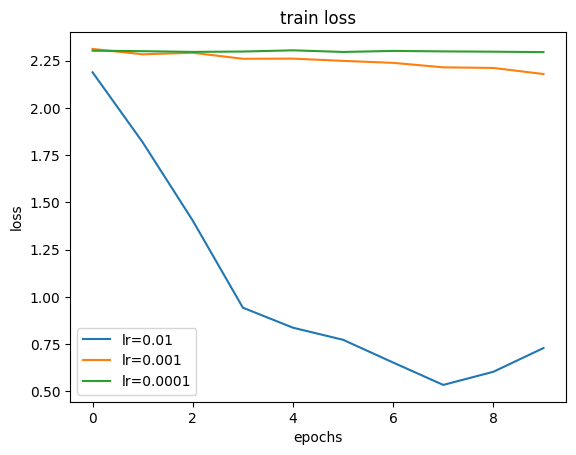

In [19]:
# 可视化损失值
draw_train_hist(tarin_hists)

In [20]:
# 不同学习率的模型测试
for model in models:
    print("model1 test accuracy:", test_acc(test_loader, model))

Accuracy of the network on the test images: 68 %
model1 test accuracy: 68.17999999999999
Accuracy of the network on the test images: 30 %
model1 test accuracy: 30.7
Accuracy of the network on the test images: 10 %
model1 test accuracy: 10.879999999999999
